In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import sys
sys.path.append('/home/ajc348/rds/hpc-work/mopo')

In [7]:
import os

import numpy as np
import matplotlib.pyplot as plt

from dogo.results import get_scores_df

In [8]:
plt.rc('font', size=22)
cols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
lss =  ['-', '--']

In [9]:
evaluation_datasets_lables = [
    ("W-D3RLPY-RT-0.1M-1-P0_10000", "D3RLPY: 0.1M"),
    ("W-D3RLPY-RT-0.2M-1-P0_10000", "D3RLPY: 0.2M"),
    ("W-D3RLPY-RT-0.5M-1-P0_10000", "D3RLPY: 0.5M"),
    ("W-D3RLPY-RT-1M-1-P0_10000", "D3RLPY: 1M"),
    ("W-D3RLPY-RT-2M-1-P0_10000", "D3RLPY: 2M"),
    ("W-D3RLPY-RT-0.1M-2-P0_10000", "D3RLPY 2 - 0.1M Steps"),
    ("W-D3RLPY-RT-0.2M-2-P0_10000", "D3RLPY 2 - 0.2M Steps"),
    ("W-D3RLPY-RT-0.5M-2-P0_10000", "D3RLPY 2 - 0.5M Steps"),
    ("W-D3RLPY-RT-1M-2-P0_10000", "D3RLPY 2 - 1M Steps"),
    ("W-D3RLPY-RT-2M-2-P0_10000", "D3RLPY 2 - 2M Steps"),
    ("W-D3RLPY-RT-0.1M-3-P0_10000", "D3RLPY 3 - 0.1M Steps"),
    ("W-D3RLPY-RT-0.2M-3-P0_10000", "D3RLPY 3 - 0.2M Steps"),
    ("W-D3RLPY-RT-0.5M-3-P0_10000", "D3RLPY 3 - 0.5M Steps"),
    ("W-D3RLPY-RT-1M-3-P0_10000", "D3RLPY 3 - 1M Steps"),
    ("W-D3RLPY-RT-2M-3-P0_10000", "D3RLPY 3 - 2M Steps"),
    ("W-SAC-RT-0.1M-1-P0_10000", "SL: 0.1M"),
    ("W-SAC-RT-0.25M-1-P0_10000", "SL: 0.25M"),
    ("W-SAC-RT-0.5M-1-P0_10000", "SL: 0.5M"),
    ("W-SAC-RT-1M-1-P0_10000", "SL: 1M"),
    ("W-SAC-RT-2M-1-P0_10000", "SL: 2M"),
    ("W-SAC-RT-3M-1-P0_10000", "SL: 3M"),
    ("W-SAC-RT-0.25M-2-P0_10000", "Softlearning 2 - 0.25M Steps"),
    ("W-SAC-RT-0.5M-2-P0_10000", "Softlearning 2 - 0.5M Steps"),
    ("W-SAC-RT-1M-2-P0_10000", "Softlearning 2 - 1M Steps"),
    ("W-SAC-RT-2M-2-P0_10000", "Softlearning 2 - 2M Steps"),
    ("W-SAC-RT-3M-2-P0_10000", "Softlearning 2 - 3M Steps"),
    ("W-SAC-RT-0.25M-3-P0_10000", "Softlearning 3 - 0.25M Steps"),
    ("W-SAC-RT-0.5M-3-P0_10000", "Softlearning 3 - 0.5M Steps"),
    ("W-SAC-RT-1M-3-P0_10000", "Softlearning 3 - 1M Steps"),
    ("W-SAC-RT-2M-3-P0_10000", "Softlearning 3 - 2M Steps"),
    ("W-SAC-RT-3M-3-P0_10000", "Softlearning 3 - 3M Steps"),
    ("D4RL-W-M_10000", "D4RL: M"),
    ("D4RL-W-ME_10000", "D4RL: ME"),
    ("D4RL-W-MR_10000", "D4RL: MR"),
    ("D4RL-W-R_10000", "D4RL: R"),
    ("W-RAND-1_10000", "Random 1"),
    ("W-RAND-2_10000", "Random 2"),
    ("W-RAND-3_10000", "Random 3"),
]
evaluation_datasets = [i[0] for i in evaluation_datasets_lables]
evaluation_labels = [i[1] for i in evaluation_datasets_lables]

labels = ['No REx', 'REx: $\\beta=5.0$', 'REx: $\\beta=10.0$', 'REx: $\\beta=20.0$']

In [32]:
rt_1_training_datasets_labels = [
    ("W-RAND-2_10000", "Random 2"),
    ("W-RAND-3_10000", "Random 3"),
    ("W-SAC-RT-0.1M-1-P0_10000", "SL: 0.1M"),
    ("W-D3RLPY-RT-0.1M-1-P0_10000", "D3RLPY: 0.1M"),
    ("W-D3RLPY-RT-0.2M-1-P0_10000", "D3RLPY: 0.2M"),
]
rt_1_training_datasets = [i[0] for i in rt_1_training_datasets_labels]
rt_1_training_labels = [i[1] for i in rt_1_training_datasets_labels]

rt_1_experiments_no_rex = ['WA001', 'WA002', 'WA003']
rt_1_experiments_rex_5  = ['WA004', 'WA005', 'WA006']
rt_1_experiments_rex_10 = ['WA007', 'WA008', 'WA009']
rt_1_experiments_rex_20 = ['WA010', 'WA011', 'WA012']

rt_1_scores_no_rex_df = get_scores_df(rt_1_experiments_no_rex, evaluation_datasets)
rt_1_scores_rex_5_df = get_scores_df(rt_1_experiments_rex_5, evaluation_datasets)
rt_1_scores_rex_10_df = get_scores_df(rt_1_experiments_rex_10, evaluation_datasets)
rt_1_scores_rex_20_df = get_scores_df(rt_1_experiments_rex_20, evaluation_datasets)

rt_1_scores_no_rex_groups = (
    rt_1_scores_no_rex_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
rt_1_scores_no_rex_avgs_df = rt_1_scores_no_rex_groups.mean().reset_index()
rt_1_scores_no_rex_mins_df = rt_1_scores_no_rex_groups.min().reset_index()
rt_1_scores_no_rex_maxs_df = rt_1_scores_no_rex_groups.max().reset_index()

rt_1_scores_rex_5_groups = (
    rt_1_scores_rex_5_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
rt_1_scores_rex_5_avgs_df = rt_1_scores_rex_5_groups.mean().reset_index()
rt_1_scores_rex_5_mins_df = rt_1_scores_rex_5_groups.min().reset_index()
rt_1_scores_rex_5_maxs_df = rt_1_scores_rex_5_groups.max().reset_index()

rt_1_scores_rex_10_groups = (
    rt_1_scores_rex_10_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
rt_1_scores_rex_10_avgs_df = rt_1_scores_rex_10_groups.mean().reset_index()
rt_1_scores_rex_10_mins_df = rt_1_scores_rex_10_groups.min().reset_index()
rt_1_scores_rex_10_maxs_df = rt_1_scores_rex_10_groups.max().reset_index()

rt_1_scores_rex_20_groups = (
    rt_1_scores_rex_20_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
rt_1_scores_rex_20_avgs_df = rt_1_scores_rex_20_groups.mean().reset_index()
rt_1_scores_rex_20_mins_df = rt_1_scores_rex_20_groups.min().reset_index()
rt_1_scores_rex_20_maxs_df = rt_1_scores_rex_20_groups.max().reset_index()

rt_1_score_avgs_df = [
    rt_1_scores_no_rex_avgs_df,
    rt_1_scores_rex_5_avgs_df,
    rt_1_scores_rex_10_avgs_df,
    rt_1_scores_rex_20_avgs_df
]

In [ ]:
rt_3_training_datasets_labels = [
    ("W-RAND-2_10000", "Random 2"),
    ("W-RAND-3_10000", "Random 3"),
    ("W-SAC-RT-0.1M-1-P0_10000", "SL: 0.1M"),
    ("W-D3RLPY-RT-0.1M-1-P0_10000", "D3RLPY: 0.1M"),
    ("W-D3RLPY-RT-0.2M-1-P0_10000", "D3RLPY: 0.2M"),
]
rt_3_training_datasets = [i[0] for i in rt_3_training_datasets_labels]
rt_3_training_labels = [i[1] for i in rt_3_training_datasets_labels]

rt_3_experiments_no_rex = ['WA013', 'WA014', 'WA015']
rt_3_experiments_rex_5  = ['WA016', 'WA017', 'WA018']
rt_3_experiments_rex_10 = ['WA019', 'WA020', 'WA021']
rt_3_experiments_rex_20 = ['WA022', 'WA023', 'WA024']

rt_3_scores_no_rex_df = get_scores_df(rt_3_experiments_no_rex, evaluation_datasets)
rt_3_scores_rex_5_df = get_scores_df(rt_3_experiments_rex_5, evaluation_datasets)
rt_3_scores_rex_10_df = get_scores_df(rt_3_experiments_rex_10, evaluation_datasets)
rt_3_scores_rex_20_df = get_scores_df(rt_3_experiments_rex_20, evaluation_datasets)

rt_3_scores_no_rex_groups = (
    rt_3_scores_no_rex_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
rt_3_scores_no_rex_avgs_df = rt_3_scores_no_rex_groups.mean().reset_index()
rt_3_scores_no_rex_mins_df = rt_3_scores_no_rex_groups.min().reset_index()
rt_3_scores_no_rex_maxs_df = rt_3_scores_no_rex_groups.max().reset_index()

rt_3_scores_rex_5_groups = (
    rt_3_scores_rex_5_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
rt_3_scores_rex_5_avgs_df = rt_3_scores_rex_5_groups.mean().reset_index()
rt_3_scores_rex_5_mins_df = rt_3_scores_rex_5_groups.min().reset_index()
rt_3_scores_rex_5_maxs_df = rt_3_scores_rex_5_groups.max().reset_index()

rt_3_scores_rex_10_groups = (
    rt_3_scores_rex_10_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
rt_3_scores_rex_10_avgs_df = rt_3_scores_rex_10_groups.mean().reset_index()
rt_3_scores_rex_10_mins_df = rt_3_scores_rex_10_groups.min().reset_index()
rt_3_scores_rex_10_maxs_df = rt_3_scores_rex_10_groups.max().reset_index()

rt_3_scores_rex_20_groups = (
    rt_3_scores_rex_20_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
rt_3_scores_rex_20_avgs_df = rt_3_scores_rex_20_groups.mean().reset_index()
rt_3_scores_rex_20_mins_df = rt_3_scores_rex_20_groups.min().reset_index()
rt_3_scores_rex_20_maxs_df = rt_3_scores_rex_20_groups.max().reset_index()

rt_3_score_avgs_df = [
    rt_3_scores_no_rex_avgs_df,
    rt_3_scores_rex_5_avgs_df,
    rt_3_scores_rex_10_avgs_df,
    rt_3_scores_rex_20_avgs_df
]

In [ ]:
rt_4_training_datasets_labels = [
    ("W-SAC-RT-1M-1-P0_10000", "SL: 1M"),
    ("W-SAC-RT-2M-1-P0_10000", "SL: 2M"),
    ("W-SAC-RT-3M-1-P0_10000", "SL: 3M"),
    ("W-D3RLPY-RT-1M-1-P0_10000", "D3RLPY: 1M"),
    ("W-D3RLPY-RT-2M-1-P0_10000", "D3RLPY: 2M"),
]
rt_4_training_datasets = [i[0] for i in rt_4_training_datasets_labels]
rt_4_training_labels = [i[1] for i in rt_4_training_datasets_labels]

rt_4_experiments_no_rex = ['WA025', 'WA026', 'WA027']
rt_4_experiments_rex_5  = ['WA028', 'WA029', 'WA030']
rt_4_experiments_rex_10 = ['WA031', 'WA032', 'WA033']
rt_4_experiments_rex_20 = ['WA034', 'WA035', 'WA036']

rt_4_scores_no_rex_df = get_scores_df(rt_4_experiments_no_rex, evaluation_datasets)
rt_4_scores_rex_5_df = get_scores_df(rt_4_experiments_rex_5, evaluation_datasets)
rt_4_scores_rex_10_df = get_scores_df(rt_4_experiments_rex_10, evaluation_datasets)
rt_4_scores_rex_20_df = get_scores_df(rt_4_experiments_rex_20, evaluation_datasets)

rt_4_scores_no_rex_groups = (
    rt_4_scores_no_rex_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
rt_4_scores_no_rex_avgs_df = rt_4_scores_no_rex_groups.mean().reset_index()
rt_4_scores_no_rex_mins_df = rt_4_scores_no_rex_groups.min().reset_index()
rt_4_scores_no_rex_maxs_df = rt_4_scores_no_rex_groups.max().reset_index()

rt_4_scores_rex_5_groups = (
    rt_4_scores_rex_5_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
rt_4_scores_rex_5_avgs_df = rt_4_scores_rex_5_groups.mean().reset_index()
rt_4_scores_rex_5_mins_df = rt_4_scores_rex_5_groups.min().reset_index()
rt_4_scores_rex_5_maxs_df = rt_4_scores_rex_5_groups.max().reset_index()

rt_4_scores_rex_10_groups = (
    rt_4_scores_rex_10_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
rt_4_scores_rex_10_avgs_df = rt_4_scores_rex_10_groups.mean().reset_index()
rt_4_scores_rex_10_mins_df = rt_4_scores_rex_10_groups.min().reset_index()
rt_4_scores_rex_10_maxs_df = rt_4_scores_rex_10_groups.max().reset_index()

rt_4_scores_rex_20_groups = (
    rt_4_scores_rex_20_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
rt_4_scores_rex_20_avgs_df = rt_4_scores_rex_20_groups.mean().reset_index()
rt_4_scores_rex_20_mins_df = rt_4_scores_rex_20_groups.min().reset_index()
rt_4_scores_rex_20_maxs_df = rt_4_scores_rex_20_groups.max().reset_index()

rt_4_score_avgs_df = [
    rt_4_scores_no_rex_avgs_df,
    rt_4_scores_rex_5_avgs_df,
    rt_4_scores_rex_10_avgs_df,
    rt_4_scores_rex_20_avgs_df
]

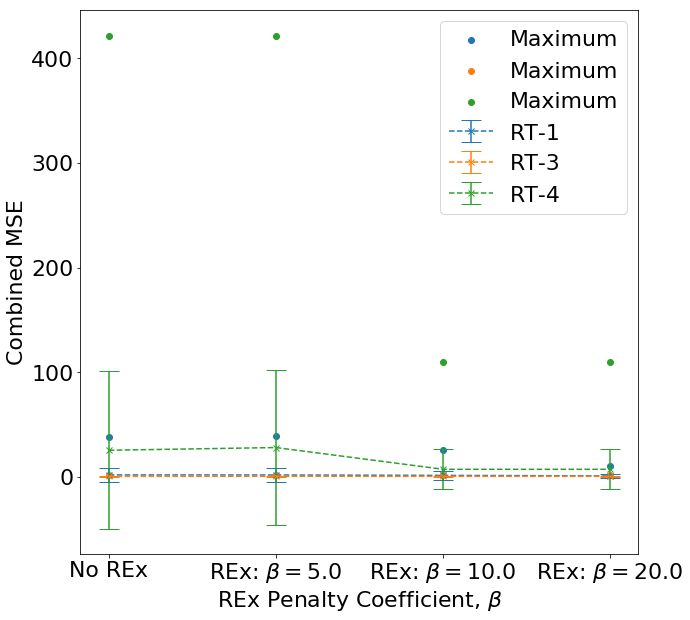

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for i, (train_eval_ds, score_avgs_dfs, exp_label) in enumerate([
    (rt_1_training_datasets, rt_1_score_avgs_df, 'RT-1'),
    (rt_3_training_datasets, rt_3_score_avgs_df, 'RT-3'),
    (rt_4_training_datasets, rt_4_score_avgs_df, 'RT-4'),
]):
    train_avgs = []
    test_avgs = []
    test_stds = []
    test_maxs = []
    for score_avg_df in score_avgs_dfs:
        train_avgs.append(score_avg_df.loc[score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'overall_mse'].mean())
        test_avgs.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'overall_mse'].mean())
        test_stds.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'overall_mse'].std(ddof=0))
        test_maxs.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'overall_mse'].max())
    ax.errorbar(labels, test_avgs, test_stds, ls='--', marker='x', color=cols[i], capsize=10, label=exp_label)
    ax.scatter(labels, test_maxs, marker='o', color=cols[i], label='Maximum')
ax.set_xticklabels(labels)
ax.set_xlabel('REx Penalty Coefficient, $\\beta$')
ax.set_ylabel('Combined MSE')
ax.set_ylim(None, None)
plt.legend()
# pd.DataFrame([train_avgs, test_avgs, test_maxs]).T.round(2)

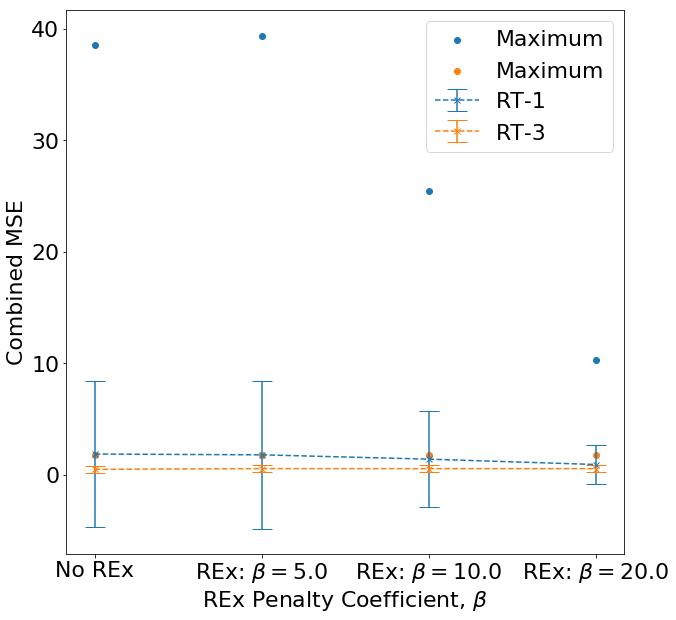

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for i, (train_eval_ds, score_avgs_dfs, exp_label) in enumerate([
    (rt_1_training_datasets, rt_1_score_avgs_df, 'RT-1'),
    (rt_3_training_datasets, rt_3_score_avgs_df, 'RT-3'),
    # (rt_4_training_datasets, rt_4_score_avgs_df, 'RT-4'),
]):
    train_avgs = []
    test_avgs = []
    test_stds = []
    test_maxs = []
    for score_avg_df in score_avgs_dfs:
        train_avgs.append(score_avg_df.loc[score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'overall_mse'].mean())
        test_avgs.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'overall_mse'].mean())
        test_stds.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'overall_mse'].std(ddof=0))
        test_maxs.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'overall_mse'].max())
    ax.errorbar(labels, test_avgs, test_stds, ls='--', marker='x', color=cols[i], capsize=10, label=exp_label)
    ax.scatter(labels, test_maxs, marker='o', color=cols[i], label='Maximum')
ax.set_xticklabels(labels)
ax.set_xlabel('REx Penalty Coefficient, $\\beta$')
ax.set_ylabel('Combined MSE')
ax.set_ylim(None, None)
plt.legend()
# pd.DataFrame([train_avgs, test_avgs, test_maxs]).T.round(2)

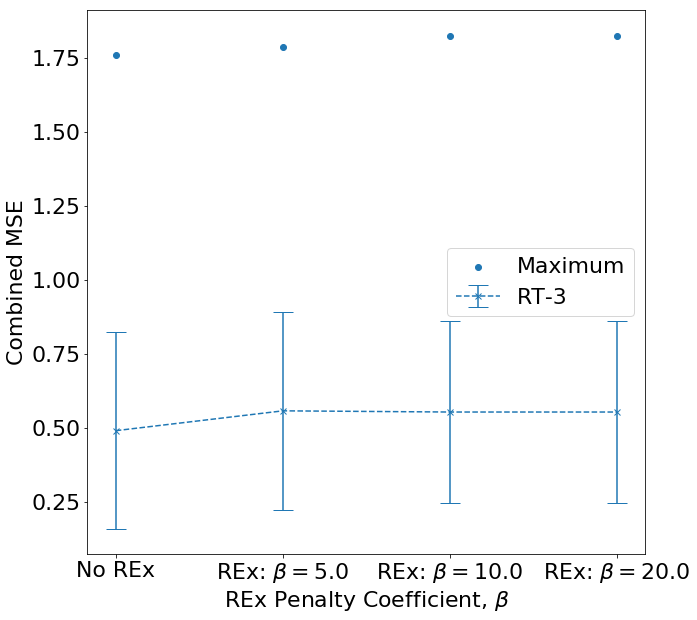

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for i, (train_eval_ds, score_avgs_dfs, exp_label) in enumerate([
    # (rt_1_training_datasets, rt_1_score_avgs_df, 'RT-1'),
    (rt_3_training_datasets, rt_3_score_avgs_df, 'RT-3'),
    # (rt_4_training_datasets, rt_4_score_avgs_df, 'RT-4'),
]):
    train_avgs = []
    test_avgs = []
    test_stds = []
    test_maxs = []
    for score_avg_df in score_avgs_dfs:
        train_avgs.append(score_avg_df.loc[score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'overall_mse'].mean())
        test_avgs.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'overall_mse'].mean())
        test_stds.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'overall_mse'].std(ddof=0))
        test_maxs.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'overall_mse'].max())
    ax.errorbar(labels, test_avgs, test_stds, ls='--', marker='x', color=cols[i], capsize=10, label=exp_label)
    ax.scatter(labels, test_maxs, marker='o', color=cols[i], label='Maximum')
ax.set_xticklabels(labels)
ax.set_xlabel('REx Penalty Coefficient, $\\beta$')
ax.set_ylabel('Combined MSE')
ax.set_ylim(None, None)
plt.legend()
# pd.DataFrame([train_avgs, test_avgs, test_maxs]).T.round(2)

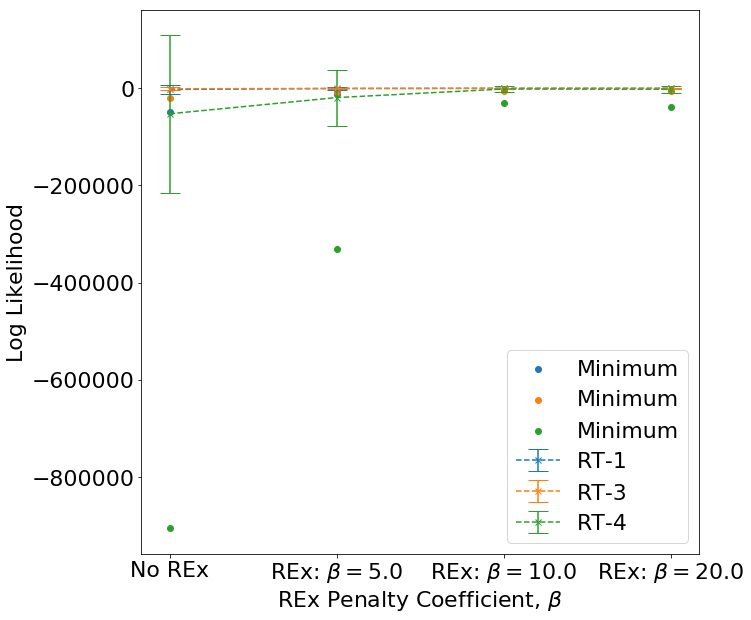

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for i, (train_eval_ds, score_avgs_dfs, exp_label) in enumerate([
    (rt_1_training_datasets, rt_1_score_avgs_df, 'RT-1'),
    (rt_3_training_datasets, rt_3_score_avgs_df, 'RT-3'),
    (rt_4_training_datasets, rt_4_score_avgs_df, 'RT-4'),
]):
    train_avgs = []
    test_avgs = []
    test_stds = []
    test_mins = []
    for score_avg_df in score_avgs_dfs:
        train_avgs.append(score_avg_df.loc[score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'log_prob'].mean())
        test_avgs.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'log_prob'].mean())
        test_stds.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'log_prob'].std(ddof=0))
        test_mins.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'log_prob'].min())
    ax.errorbar(labels, test_avgs, test_stds, ls='--', marker='x', color=cols[i], capsize=10, label=exp_label)
    ax.scatter(labels, test_mins, marker='o', color=cols[i], label='Minimum')
ax.set_xticklabels(labels)
ax.set_xlabel('REx Penalty Coefficient, $\\beta$')
ax.set_ylabel('Log Likelihood')
ax.set_ylim(None, None)
plt.legend()
# pd.DataFrame([train_avgs, test_avgs, test_maxs]).T.round(2)

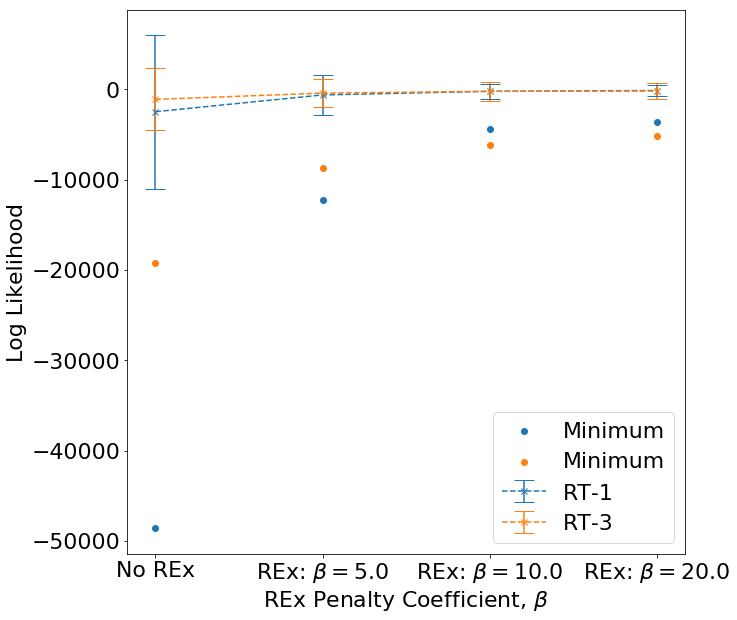

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for i, (train_eval_ds, score_avgs_dfs, exp_label) in enumerate([
    (rt_1_training_datasets, rt_1_score_avgs_df, 'RT-1'),
    (rt_3_training_datasets, rt_3_score_avgs_df, 'RT-3'),
    # (rt_4_training_datasets, rt_4_score_avgs_df, 'RT-4'),
]):
    train_avgs = []
    test_avgs = []
    test_stds = []
    test_mins = []
    for score_avg_df in score_avgs_dfs:
        train_avgs.append(score_avg_df.loc[score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'log_prob'].mean())
        test_avgs.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'log_prob'].mean())
        test_stds.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'log_prob'].std(ddof=0))
        test_mins.append(score_avg_df.loc[~score_avg_df['evaluation_dataset'].isin(train_eval_ds), 'log_prob'].min())
    ax.errorbar(labels, test_avgs, test_stds, ls='--', marker='x', color=cols[i], capsize=10, label=exp_label)
    ax.scatter(labels, test_mins, marker='o', color=cols[i], label='Minimum')
ax.set_xticklabels(labels)
ax.set_xlabel('REx Penalty Coefficient, $\\beta$')
ax.set_ylabel('Log Likelihood')
ax.set_ylim(None, None)
plt.legend()
# pd.DataFrame([train_avgs, test_avgs, test_maxs]).T.round(2)